## Task 2:

### Problem Statement
From iris dataset, Predict the number of Cluster and represent it visually.

#### by Aditya Kumar Singh


In [1]:
# importing neccessay libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
# Loading dataset
df = pd.read_csv('Iris.csv')

In [3]:
# check first 5 rows of dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# check categories
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# checking null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# drop id  columns as this is insignificant
df= df.drop(columns=['Id'])

<AxesSubplot:>

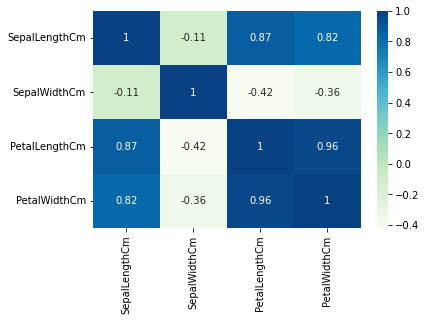

In [8]:
#finding correlation of features 
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='GnBu')

### Preprocessing

In [9]:
# converting categorical to numerical ie. machine understandable language
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])


In [10]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
df.Species.unique()

array([0, 1, 2])

In [12]:
df.shape

(150, 5)

In [13]:
x= df.drop(['Species'],axis=1) # features
y= df.Species # labels

In [14]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Predicting number of clusters

In [15]:

wcss=[]
for i in range(1,15):
    kmean=KMeans(n_clusters=i , init='k-means++' , random_state=30)
    kmean.fit(x)
    wcss.append(kmean.inertia_)

C:\Users\91991\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


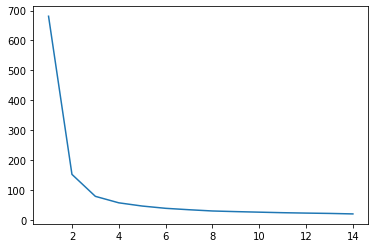

In [16]:
#this is elbow graph
plt.plot(range(1,15),wcss)

 **From the elbow  graph we can infer that no of cluster= 3**

In [17]:
# numpy array
x = x.to_numpy()

In [18]:
y = y.to_numpy()

In [19]:
print(type(x))

<class 'numpy.ndarray'>


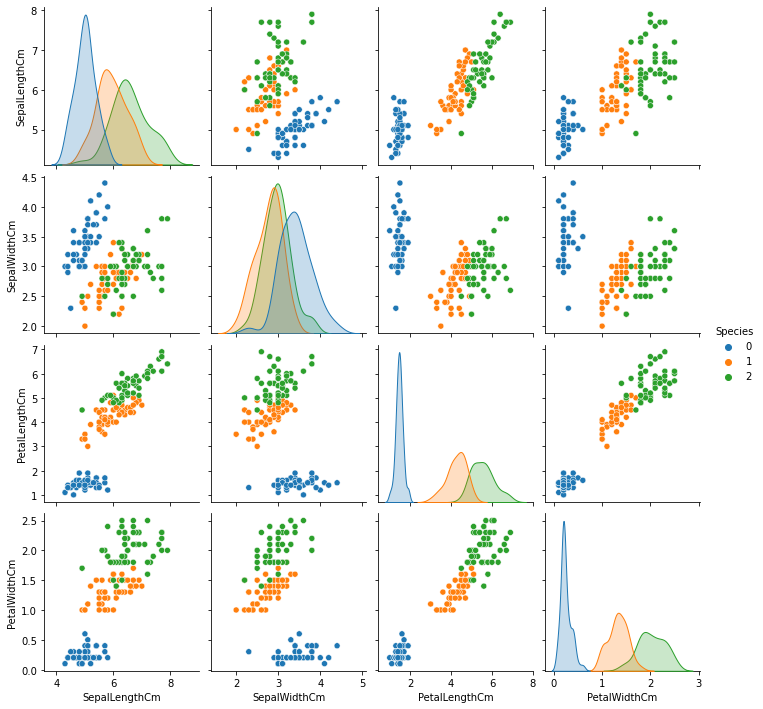

In [20]:
sns.pairplot(df , hue='Species' ,palette='tab10')

**K-means clustering** is a simple unsupervised learning algorithm that is used to solve clustering problems.

In [21]:
# Modelling using k-means++ algorithm
kmeans = KMeans(n_clusters = 3, init = 'k-means++')

In [22]:
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [23]:
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

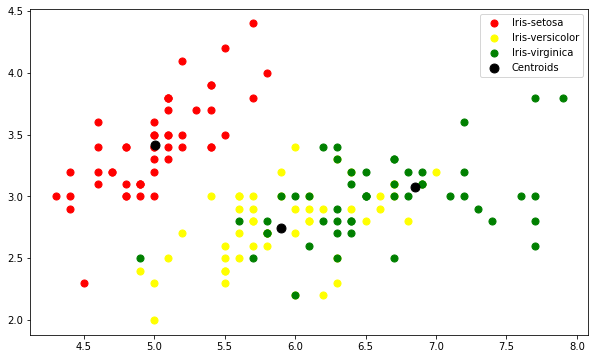

In [24]:
#Applying kmeans to the dataset / Creating the kmeans classifier
plt.figure(figsize=(10,6))
plt.scatter(x[y == 0,0], x[y==0,1], s = 50, c= 'red', label = 'Iris-setosa')
plt.scatter(x[y == 1,0], x[y==1,1], s = 50, c= 'yellow', label = 'Iris-versicolor')
plt.scatter(x[y == 2,0], x[y==2,1], s = 50, c= 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 80, c = 'black', label = 'Centroids')

plt.legend()

plt.show()